# FLIGHT PRICE PREDICTION WITH SCRAPPED DATA

In [94]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [95]:
df=pd.read_csv("Flight_scrapping1.csv")
df

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
0,0,AirAsia,Delhi,Mumbai,20:00,07:05,1-stop,11h 05m,NaN,08/07/2022
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4475,1572,Air India,Mumbai,Bangalore,11:15,12:30,2+-stop,09h 35m,NaN,21/07/2022
4476,1573,Air India,Mumbai,Bangalore,11:15,16:15,2+-stop,09h 35m,NaN,21/07/2022
4477,1574,Air India,Mumbai,Bangalore,18:50,20:15,2+-stop,11h 15m,NaN,21/07/2022
4478,1575,Air India,Mumbai,Bangalore,18:50,16:15,2+-stop,11h 20m,NaN,21/07/2022


In [96]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Source', 'Destination', 'Depature Time',
       'Arrival Time', 'Stops', 'Duration', 'Price', 'Date'],
      dtype='object')

In [97]:
df.dtypes

Unnamed: 0        int64
Airline          object
Source           object
Destination      object
Depature Time    object
Arrival Time     object
Stops            object
Duration         object
Price            object
Date             object
dtype: object

In [98]:
df.isnull().sum()

Unnamed: 0          0
Airline             0
Source              0
Destination         0
Depature Time       0
Arrival Time        0
Stops               0
Duration           63
Price            1899
Date                0
dtype: int64

<AxesSubplot:>

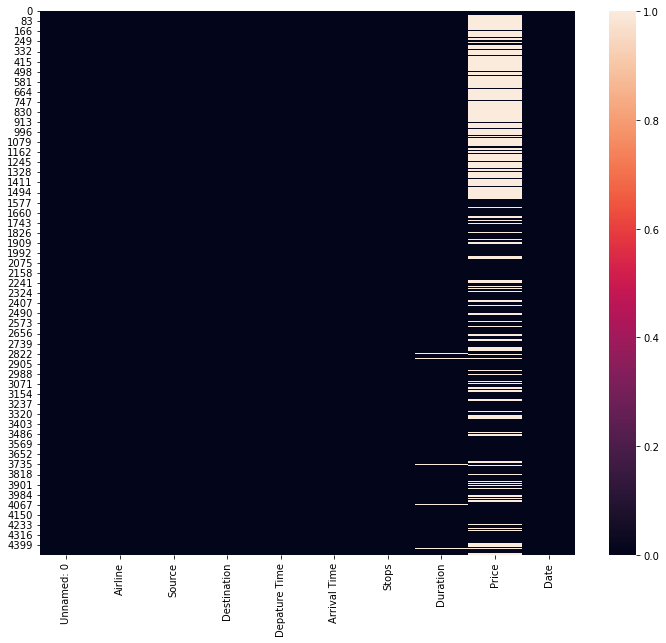

In [99]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

## Missing values present in duration and target column Price

In [100]:
df.Duration.unique()

array(['11h 05m', '02h 00m', '02h 05m', '02h 10m', '02h 15m', '02h 20m',
       '02h 25m', '02h 30m', '06h 25m', '08h 55m', '06h 40m', '09h 35m',
       '10h 15m', '11h 45m', '12h 30m', '13h 10m', '14h 05m', '02h 35m',
       '03h 40m', 'Via Indore', '04h 55m', '12h 05m', '12h 20m',
       '04h 15m', 'Via IXU', '14h 30m', '01h 50m', '04h 45m', '07h 25m',
       '08h 35m', '08h 50m', '04h 40m', '07h 05m', '08h 15m', '10h 05m',
       '05h 20m', '09h 05m', '04h 00m', '04h 05m', '05h 55m', '14h 00m',
       '04h 20m', '04h 50m', '05h 05m', '05h 15m', '06h 35m', '07h 00m',
       '07h 20m', '07h 45m', '09h 15m', '09h 30m', '09h 55m', '25h 00m',
       '10h 55m', '15h 15m', '06h 05m', '09h 50m', '12h 40m', '05h 10m',
       '06h 45m', '08h 30m', '17h 35m', '21h 50m', '15h 20m', '10h 45m',
       '18h 05m', '26h 40m', '05h 25m', '15h 05m', '16h 25m', '13h 25m',
       '17h 55m', '19h 15m', '10h 35m', '12h 35m', '18h 35m', '20h 05m',
       '21h 35m', '27h 10m', 'Via CNN', '16h 40m', '24h 40m

In [101]:
#REPLACING THE NOISE WITH NAN 
df.loc[df["Duration"] == "Via Indore", "Duration"] = ""
df.loc[df["Duration"] == "Via IXU", "Duration"] = ""
df.loc[df["Duration"] == "Via Guwahati", "Duration"] = ""
df.loc[df["Duration"] == "Via CNN", "Duration"] = ""
df.loc[df["Duration"] == "Via Raipur", "Duration"] = ""
df.loc[df["Duration"] == "Via VTZ", "Duration"] = ""
df.loc[df["Duration"] == "Via IDR", "Duration"] = ""
df.loc[df["Duration"] == "Via Bhopal", "Duration"] = ""


df.head()

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
0,0,AirAsia,Delhi,Mumbai,20:00,07:05,1-stop,11h 05m,NaN,08/07/2022
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022


In [102]:
df=df.mask(df == '')
df

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
0,0,AirAsia,Delhi,Mumbai,20:00,07:05,1-stop,11h 05m,NaN,08/07/2022
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4475,1572,Air India,Mumbai,Bangalore,11:15,12:30,2+-stop,09h 35m,NaN,21/07/2022
4476,1573,Air India,Mumbai,Bangalore,11:15,16:15,2+-stop,09h 35m,NaN,21/07/2022
4477,1574,Air India,Mumbai,Bangalore,18:50,20:15,2+-stop,11h 15m,NaN,21/07/2022
4478,1575,Air India,Mumbai,Bangalore,18:50,16:15,2+-stop,11h 20m,NaN,21/07/2022


In [103]:
df.isnull().sum()

Unnamed: 0          0
Airline             0
Source              0
Destination         0
Depature Time       0
Arrival Time        0
Stops               0
Duration           92
Price            1899
Date                0
dtype: int64

In [104]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*100)

0       3
899     3
907     3
906     3
905     3
       ..
1555    1
1554    1
1553    1
1551    1
1576    1
Name: Unnamed: 0, Length: 1577, dtype: int64
****************************************************************************************************
Vistara        1238
Indigo          998
Air India       944
GO FIRST        506
SpiceJet        462
AirAsia         329
AllianceAir       3
Name: Airline, dtype: int64
****************************************************************************************************
Delhi      2608
Mumbai     1437
Kolkata     435
Name: Source, dtype: int64
****************************************************************************************************
Bangalore    1132
Delhi        1079
Goa           735
Mumbai        679
Kolkata       450
Pune          263
Patna         142
Name: Destination, dtype: int64
****************************************************************************************************
17:35    80
07:00    78
10:25    75
20:0

**Replacing extra keywords with suitable to avoid noise in data**

In [105]:
df.loc[df["Stops"] == "1-stop Via IXU", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via Indore", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via Guwahati", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via CNN", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via Raipur", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via VTZ", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via IDR", "Stops"] = "1-stop"
df.loc[df["Stops"] == "1-stop Via Bhopal", "Stops"] = "1-stop"
df

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
0,0,AirAsia,Delhi,Mumbai,20:00,07:05,1-stop,11h 05m,NaN,08/07/2022
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4475,1572,Air India,Mumbai,Bangalore,11:15,12:30,2+-stop,09h 35m,NaN,21/07/2022
4476,1573,Air India,Mumbai,Bangalore,11:15,16:15,2+-stop,09h 35m,NaN,21/07/2022
4477,1574,Air India,Mumbai,Bangalore,18:50,20:15,2+-stop,11h 15m,NaN,21/07/2022
4478,1575,Air India,Mumbai,Bangalore,18:50,16:15,2+-stop,11h 20m,NaN,21/07/2022


In [106]:
df.Stops.value_counts()

1-stop      3148
non-stop     879
2+-stop      453
Name: Stops, dtype: int64

In [107]:
df.sample()

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
54,54,Air India,Delhi,Mumbai,14:00,16:15,non-stop,02h 15m,NaN,08/07/2022


In [108]:
df.shape

(4480, 10)

**Dropping rows having nan values as will create noise and affect accuracy if filled with any**

In [109]:
df1=df.dropna()
df1=df.dropna(axis=0)

In [110]:
df1

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
5,5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4466,1563,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,1564,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,1565,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,1570,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


**Dropping AllianceAir in airline column as it is having only 2 counts**

In [111]:
df1 = df1.drop(df1.index[df1['Airline'] == 'AllianceAir'])
df1

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
5,5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4466,1563,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,1564,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,1565,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,1570,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


<AxesSubplot:>

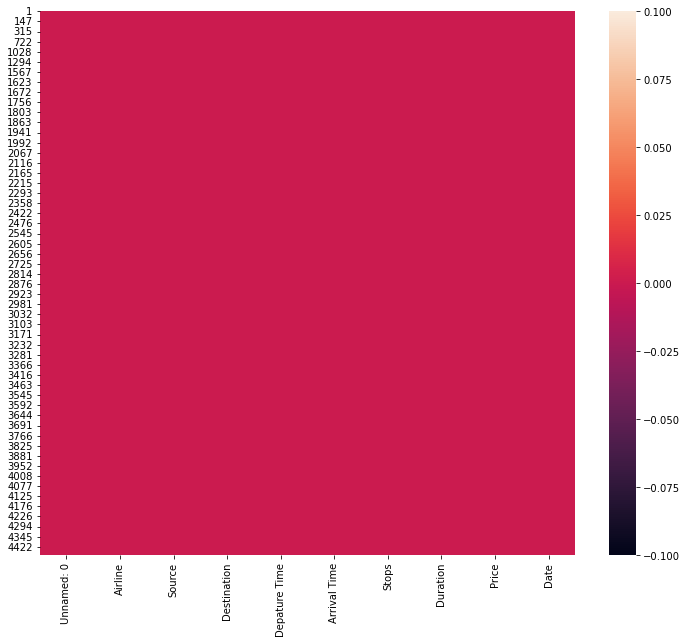

In [112]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.isnull())

##### now no null value present

# EDA (Exploratory Data Analysis)

In [113]:
df1

,Unnamed: 0,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
5,5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...,...
4466,1563,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,1564,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,1565,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,1570,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


unnamed 0 has no meaning so dropping it

In [114]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1

,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


### Handelling date and time format 
as we know i have scrapped the data for tommorow and after 1 month

so simply replace the date with 0 ,1 and 2 where 0 is the next day , 1 represents the date after 15 days and 2 after one month.

In [115]:
df1.loc[df1["Date"] == "21/06/2022", "Date"] = 0
df1

,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",08/07/2022
2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",08/07/2022
3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",08/07/2022
4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",08/07/2022
5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",08/07/2022
...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


In [116]:
df1.loc[df1["Date"] == "08/07/2022", "Date"] = 1
df1

,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",1
2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",1
3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",1
4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",1
5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",1
...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",21/07/2022
4467,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",21/07/2022
4468,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",21/07/2022
4473,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",21/07/2022


In [117]:
df1.loc[df1["Date"] == "21/07/2022", "Date"] = 2
df1

,Airline,Source,Destination,Depature Time,Arrival Time,Stops,Duration,Price,Date
1,Vistara,Delhi,Mumbai,05:55,07:55,non-stop,02h 00m,"7,110",1
2,Indigo,Delhi,Mumbai,02:10,04:10,non-stop,02h 00m,"7,109",1
3,Indigo,Delhi,Mumbai,11:55,13:55,non-stop,02h 00m,"7,109",1
4,Indigo,Delhi,Mumbai,06:30,08:35,non-stop,02h 05m,"7,109",1
5,Indigo,Delhi,Mumbai,07:20,09:25,non-stop,02h 05m,"7,109",1
...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,12:15,23:20,2+-stop,09h 30m,"13,826",2
4467,Vistara,Mumbai,Bangalore,12:15,09:00,2+-stop,04h 30m,"13,826",2
4468,Vistara,Mumbai,Bangalore,12:15,10:50,2+-stop,06h 40m,"13,826",2
4473,Vistara,Mumbai,Bangalore,12:15,22:40,2+-stop,09h 35m,"14,813",2


In [118]:
# Handelling Duration, Depature time and arrival time
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df1["Dep_hour"] = pd.to_datetime(df1["Depature Time"]).dt.hour

# Extracting Minutes
df1["Dep_min"] = pd.to_datetime(df1["Depature Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df1.drop(["Depature Time"], axis = 1, inplace = True)
df1

,Airline,Source,Destination,Arrival Time,Stops,Duration,Price,Date,Dep_hour,Dep_min
1,Vistara,Delhi,Mumbai,07:55,non-stop,02h 00m,"7,110",1,5,55
2,Indigo,Delhi,Mumbai,04:10,non-stop,02h 00m,"7,109",1,2,10
3,Indigo,Delhi,Mumbai,13:55,non-stop,02h 00m,"7,109",1,11,55
4,Indigo,Delhi,Mumbai,08:35,non-stop,02h 05m,"7,109",1,6,30
5,Indigo,Delhi,Mumbai,09:25,non-stop,02h 05m,"7,109",1,7,20
...,...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,23:20,2+-stop,09h 30m,"13,826",2,12,15
4467,Vistara,Mumbai,Bangalore,09:00,2+-stop,04h 30m,"13,826",2,12,15
4468,Vistara,Mumbai,Bangalore,10:50,2+-stop,06h 40m,"13,826",2,12,15
4473,Vistara,Mumbai,Bangalore,22:40,2+-stop,09h 35m,"14,813",2,12,15


In [119]:

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df1["Arrival_hour"] = pd.to_datetime(df1['Arrival Time']).dt.hour

# Extracting Minutes
df1["Arrival_min"] = pd.to_datetime(df1['Arrival Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
df1.drop(["Arrival Time"], axis = 1, inplace = True)
df1.head()

,Airline,Source,Destination,Stops,Duration,Price,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
1,Vistara,Delhi,Mumbai,non-stop,02h 00m,"7,110",1,5,55,7,55
2,Indigo,Delhi,Mumbai,non-stop,02h 00m,"7,109",1,2,10,4,10
3,Indigo,Delhi,Mumbai,non-stop,02h 00m,"7,109",1,11,55,13,55
4,Indigo,Delhi,Mumbai,non-stop,02h 05m,"7,109",1,6,30,8,35
5,Indigo,Delhi,Mumbai,non-stop,02h 05m,"7,109",1,7,20,9,25


In [120]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]         # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration            


In [121]:
# Adding duration_hours and duration_mins list to train_data dataframe

df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins

In [122]:

df1.drop(["Duration"], axis = 1, inplace = True)

In [123]:
df1.head()

,Airline,Source,Destination,Stops,Price,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1,Vistara,Delhi,Mumbai,non-stop,"7,110",1,5,55,7,55,2,0
2,Indigo,Delhi,Mumbai,non-stop,"7,109",1,2,10,4,10,2,0
3,Indigo,Delhi,Mumbai,non-stop,"7,109",1,11,55,13,55,2,0
4,Indigo,Delhi,Mumbai,non-stop,"7,109",1,6,30,8,35,2,5
5,Indigo,Delhi,Mumbai,non-stop,"7,109",1,7,20,9,25,2,5


In [124]:
df1['Price']=df1['Price'].apply(lambda x:x.replace(',','')) # Reducing noise in data
df1

,Airline,Source,Destination,Stops,Price,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1,Vistara,Delhi,Mumbai,non-stop,7110,1,5,55,7,55,2,0
2,Indigo,Delhi,Mumbai,non-stop,7109,1,2,10,4,10,2,0
3,Indigo,Delhi,Mumbai,non-stop,7109,1,11,55,13,55,2,0
4,Indigo,Delhi,Mumbai,non-stop,7109,1,6,30,8,35,2,5
5,Indigo,Delhi,Mumbai,non-stop,7109,1,7,20,9,25,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,23,20,9,30
4467,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,9,0,4,30
4468,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,10,50,6,40
4473,Vistara,Mumbai,Bangalore,2+-stop,14813,2,12,15,22,40,9,35


In [125]:
df1['date'] = df1['Date'].astype(str).astype(int)
df1['date']

1       1
2       1
3       1
4       1
5       1
       ..
4466    2
4467    2
4468    2
4473    2
4479    2
Name: date, Length: 2529, dtype: int64

In [126]:
df1['price'] = df1['Price'].astype(str).astype(int)
df1['price']

1        7110
2        7109
3        7109
4        7109
5        7109
        ...  
4466    13826
4467    13826
4468    13826
4473    14813
4479    18333
Name: price, Length: 2529, dtype: int64

In [127]:
df1

,Airline,Source,Destination,Stops,Price,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
1,Vistara,Delhi,Mumbai,non-stop,7110,1,5,55,7,55,2,0,1,7110
2,Indigo,Delhi,Mumbai,non-stop,7109,1,2,10,4,10,2,0,1,7109
3,Indigo,Delhi,Mumbai,non-stop,7109,1,11,55,13,55,2,0,1,7109
4,Indigo,Delhi,Mumbai,non-stop,7109,1,6,30,8,35,2,5,1,7109
5,Indigo,Delhi,Mumbai,non-stop,7109,1,7,20,9,25,2,5,1,7109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,23,20,9,30,2,13826
4467,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,9,0,4,30,2,13826
4468,Vistara,Mumbai,Bangalore,2+-stop,13826,2,12,15,10,50,6,40,2,13826
4473,Vistara,Mumbai,Bangalore,2+-stop,14813,2,12,15,22,40,9,35,2,14813


In [128]:
df1.drop(['Price'],axis=1,inplace=True)
df1.drop(['Date'],axis=1,inplace=True)
df1

,Airline,Source,Destination,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
1,Vistara,Delhi,Mumbai,non-stop,5,55,7,55,2,0,1,7110
2,Indigo,Delhi,Mumbai,non-stop,2,10,4,10,2,0,1,7109
3,Indigo,Delhi,Mumbai,non-stop,11,55,13,55,2,0,1,7109
4,Indigo,Delhi,Mumbai,non-stop,6,30,8,35,2,5,1,7109
5,Indigo,Delhi,Mumbai,non-stop,7,20,9,25,2,5,1,7109
...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Vistara,Mumbai,Bangalore,2+-stop,12,15,23,20,9,30,2,13826
4467,Vistara,Mumbai,Bangalore,2+-stop,12,15,9,0,4,30,2,13826
4468,Vistara,Mumbai,Bangalore,2+-stop,12,15,10,50,6,40,2,13826
4473,Vistara,Mumbai,Bangalore,2+-stop,12,15,22,40,9,35,2,14813


In [129]:
df1.describe()

,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
count,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000
mean,13.036773,27.714512,14.400554,28.234480,9.903124,26.241597,1.080269,10984.495453
std,5.561423,17.296396,6.482792,17.612567,7.521679,17.150112,0.942724,4100.643498
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4368.000000
25%,8.000000,15.000000,9.000000,15.000000,4.000000,10.000000,0.000000,8424.000000
50%,13.000000,30.000000,16.000000,25.000000,8.000000,25.000000,1.000000,9936.000000
75%,18.000000,45.000000,20.000000,45.000000,14.000000,40.000000,2.000000,13017.000000
max,23.000000,55.000000,23.000000,55.000000,48.000000,55.000000,2.000000,30445.000000


DESCRIPTION OF DATA

1)SKEWNESS PRESENT IN OUR TARGET COLUMN AS HAVING HIGH STD

2)COUNT ARE SAME SO NO NULL VALUE

3)RIGHT AND LEFT SKEWNESS CAN BE SEEN IN SOME COLUMNS AS MODE IS GREATER IN COLUMNS

## Data Visualization

<AxesSubplot:title={'center':'Airline count on stops'}, xlabel='Airline', ylabel='count'>

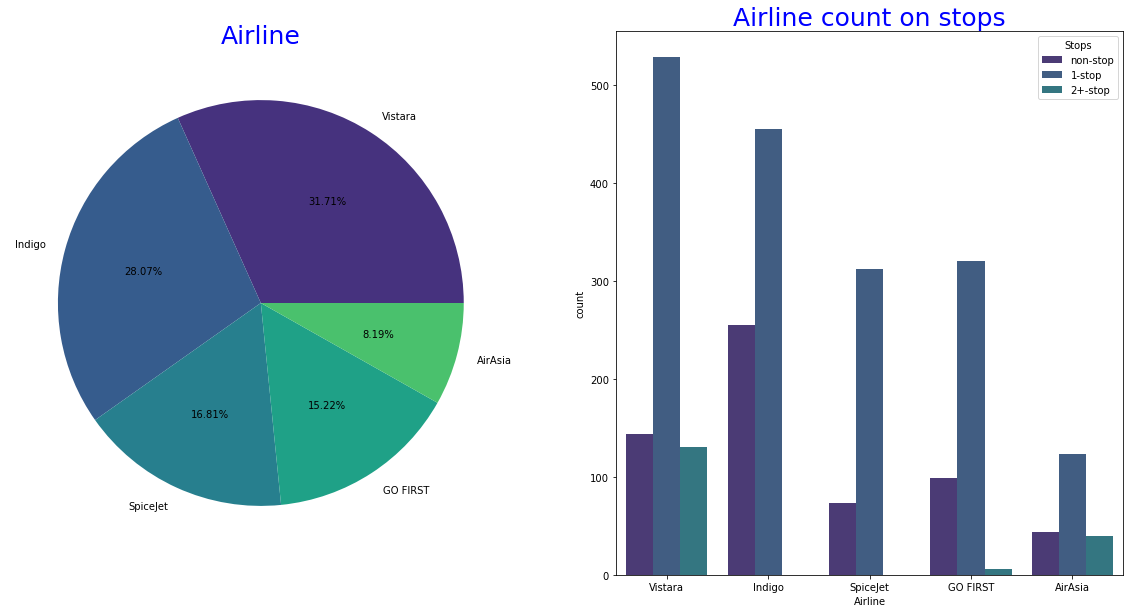

In [130]:
plt.figure(figsize=(20,10))


colors=sns.color_palette('viridis')
labels=df1['Airline'].dropna().unique()

plt.subplot(1,2,1)

plt.title('Airline',fontsize= 25,
        fontweight =200,
        color = 'blue')
plt.pie(df1['Airline'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')


plt.subplot(1,2,2)

plt.title('Airline count on stops',fontsize= 25,
        fontweight =200,
        color = 'blue',)


sns.countplot(data = df1, x = 'Airline', palette=colors, hue = 'Stops')

OBSEVATION:

Our data contains 36% of vistara flights followed by indigo

Vistara flights are having more number of flights with 1 stop followed by indigo 

Air asia is having the lowest count amongst all



1-stop      1738
non-stop     615
2+-stop      176
Name: Stops, dtype: int64

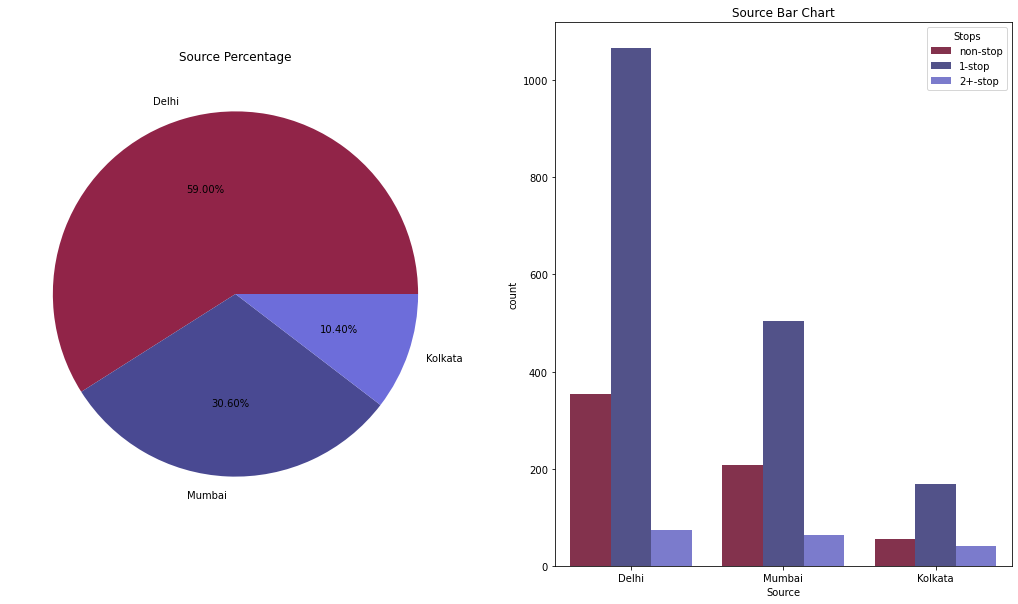

In [131]:
colors=sns.color_palette('gist_stern')
labels=df1['Source'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Source Percentage')
plt.pie(df1['Source'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Source Bar Chart')
sns.countplot(x="Source", data=df1, palette=colors,hue='Stops')

df1.Stops.value_counts(dropna=False)

FROM THE ABOVE PIE CHART AND COUNT PLOT WE CAN SEE THAT

MOST FLIGHTS ARE FROM DELHI FOLLOWED BY MUMBAI 

MAXIMUM FLIGHTS TO THEIR DESTINATION ARE WITH 1 STOP 

FLIGHTS FROM KOLKATA ARE LESS IN NUMBERS

1-stop      1738
non-stop     615
2+-stop      176
Name: Stops, dtype: int64

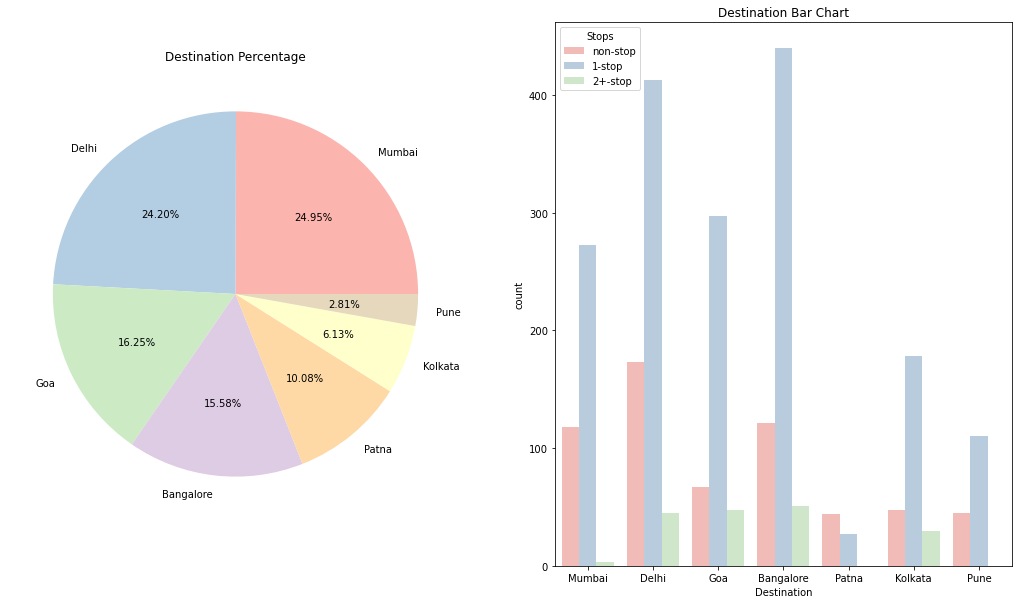

In [132]:
colors=sns.color_palette('Pastel1')
labels=df1['Destination'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Destination Percentage')
plt.pie(df1['Destination'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Destination Bar Chart')
sns.countplot(x="Destination", data=df1, palette=colors,hue='Stops')

df1.Stops.value_counts(dropna=False)

MUMBAI AND DELHI ARE HAVING THE HIGHEST FLIGHT DESTINATION AND MOSTLY WITH 1 STOP FOLLOWED BY GOA AND BANGALORE

THEIR ARE LESS FLIGHTS TO PUNE 

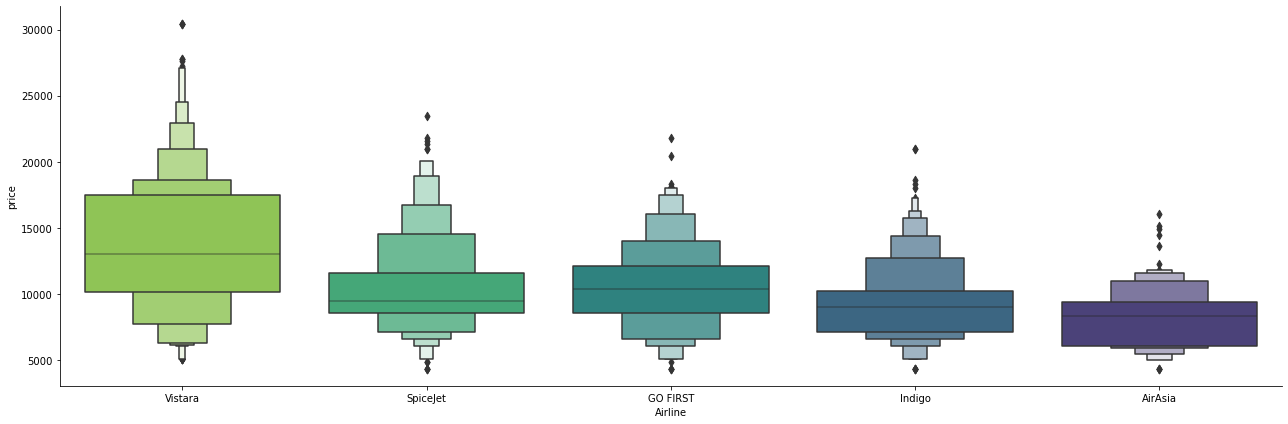

In [133]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "price", x = "Airline",palette='viridis_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Vistara flights are more costly than others and vistara flights have a high frequency too 

cheapest flights are air asia or spice jet 



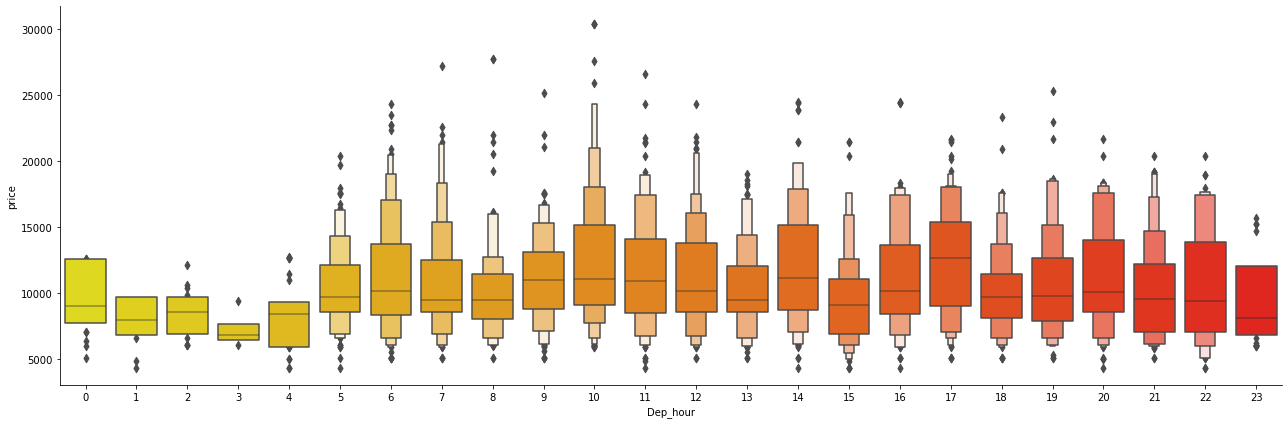

In [134]:
# Source vs Price
sns.catplot(y = "price", x = "Dep_hour",palette='autumn_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

FROM THE ABOVE GRAPH IT IS SEEN THAT EARLY MORNING FLIGHTS ARE A LITTLE EXPENSIVE THAN ANY OTHER TIMING

LATE NIGHT FLIGHTS ARE HAVING LOW PRICE AND LOW IN COUNT



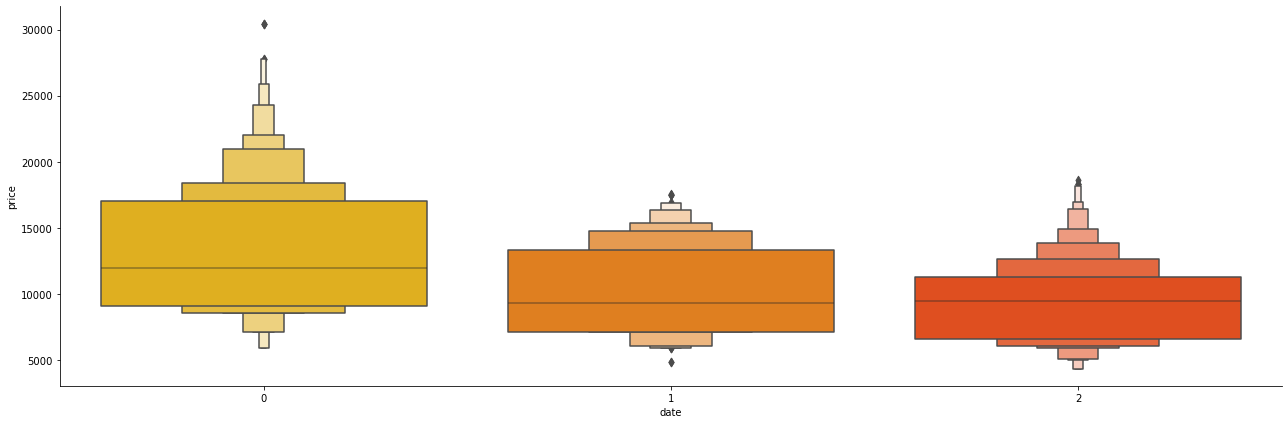

In [135]:
# Source vs Price
sns.catplot(y = "price", x = "date",palette='autumn_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

date of travel also decides the fare price 

tickets after one month are comparatively low followed by tickets after 15 days.

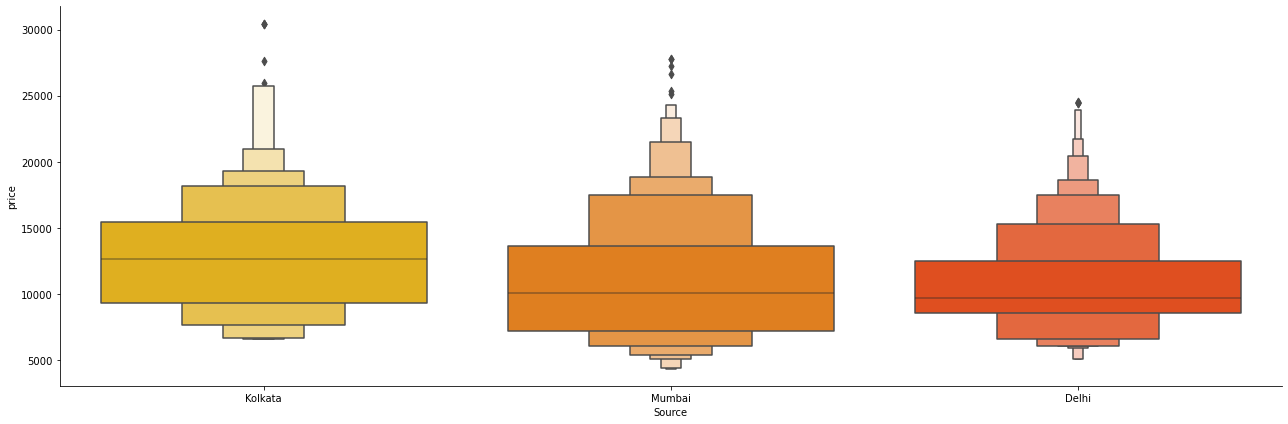

In [136]:
# Source vs Price
sns.catplot(y = "price", x = "Source",palette='autumn_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Flights from kolkata are marked a high price followed by mumbai and delhi 

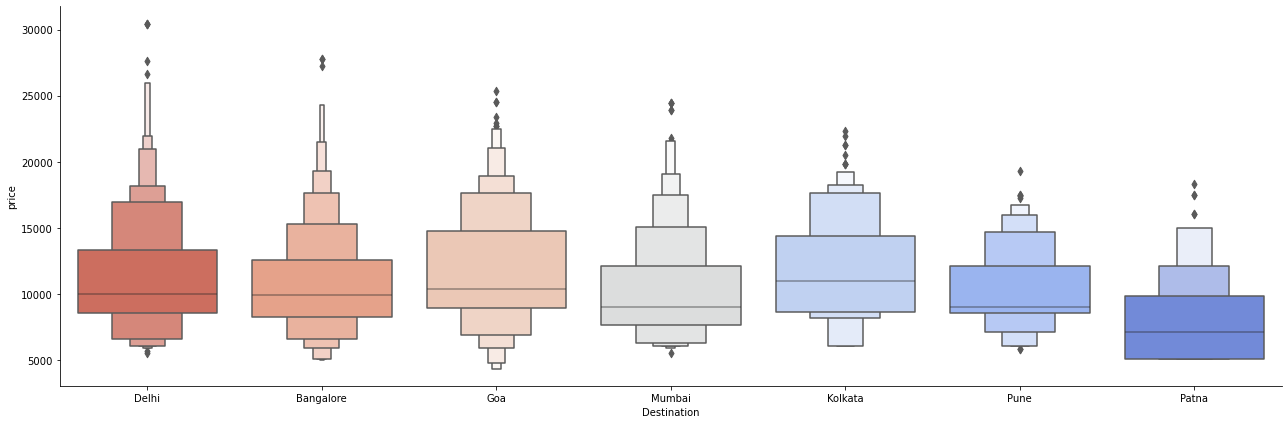

In [137]:
# Destination vs Price
sns.catplot(y = "price", x = "Destination",palette='coolwarm_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Flights for goa delhi and kolkata are having a bit higher price than others

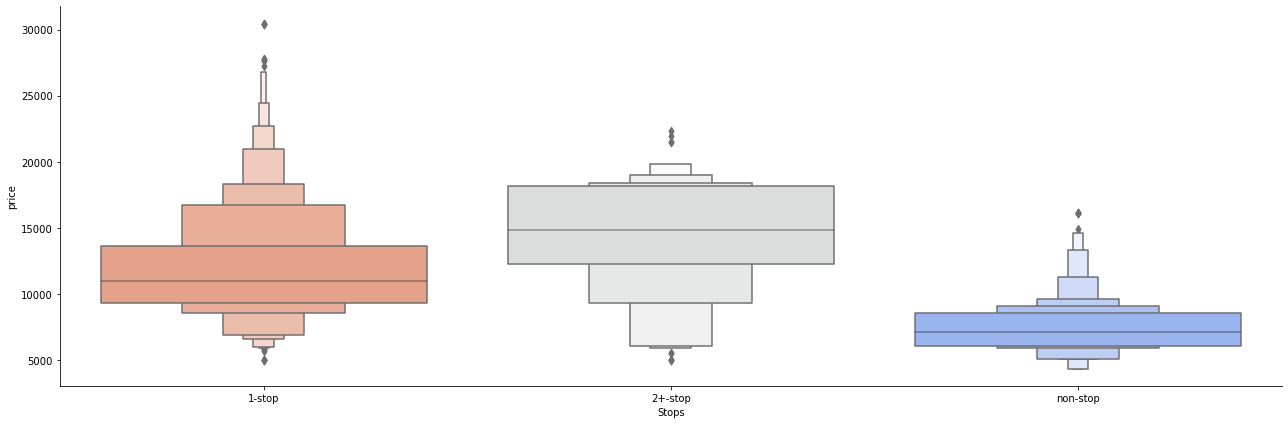

In [138]:
# Destination vs Price
sns.catplot(y = "price", x = "Stops",palette='coolwarm_r', data = df1.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

2 stop or more than that are having a higher price than 1stop or non stop 

1 stop flight are more in number than others

In [139]:
df1.head()

,Airline,Source,Destination,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
1,Vistara,Delhi,Mumbai,non-stop,5,55,7,55,2,0,1,7110
2,Indigo,Delhi,Mumbai,non-stop,2,10,4,10,2,0,1,7109
3,Indigo,Delhi,Mumbai,non-stop,11,55,13,55,2,0,1,7109
4,Indigo,Delhi,Mumbai,non-stop,6,30,8,35,2,5,1,7109
5,Indigo,Delhi,Mumbai,non-stop,7,20,9,25,2,5,1,7109


## Correlation

In [140]:
df1.corr()

,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
Dep_hour,1.000000,0.046109,-0.018622,0.033435,0.025986,-0.003755,-0.012635,0.018710
Dep_min,0.046109,1.000000,0.005063,0.038008,0.016510,-0.024035,-0.018705,0.043330
Arrival_hour,-0.018622,0.005063,1.000000,0.011479,-0.005166,0.028738,-0.030247,0.127743
Arrival_min,0.033435,0.038008,0.011479,1.000000,0.053695,0.026806,-0.009687,0.085471
Duration_hours,0.025986,0.016510,-0.005166,0.053695,1.000000,0.032288,-0.030980,0.196052
Duration_mins,-0.003755,-0.024035,0.028738,0.026806,0.032288,1.000000,-0.001518,0.064077
date,-0.012635,-0.018705,-0.030247,-0.009687,-0.030980,-0.001518,1.000000,-0.413205
price,0.018710,0.043330,0.127743,0.085471,0.196052,0.064077,-0.413205,1.000000


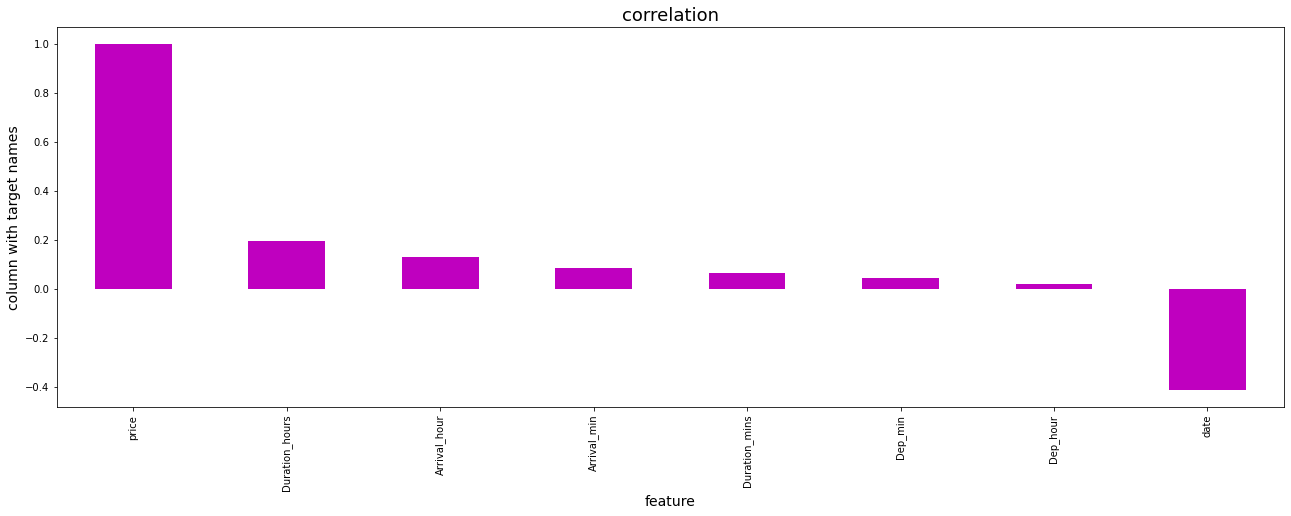

In [141]:
plt.figure(figsize=(22,7))
df1.corr()['price'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

only date is having a negative correlation with price 

<AxesSubplot:>

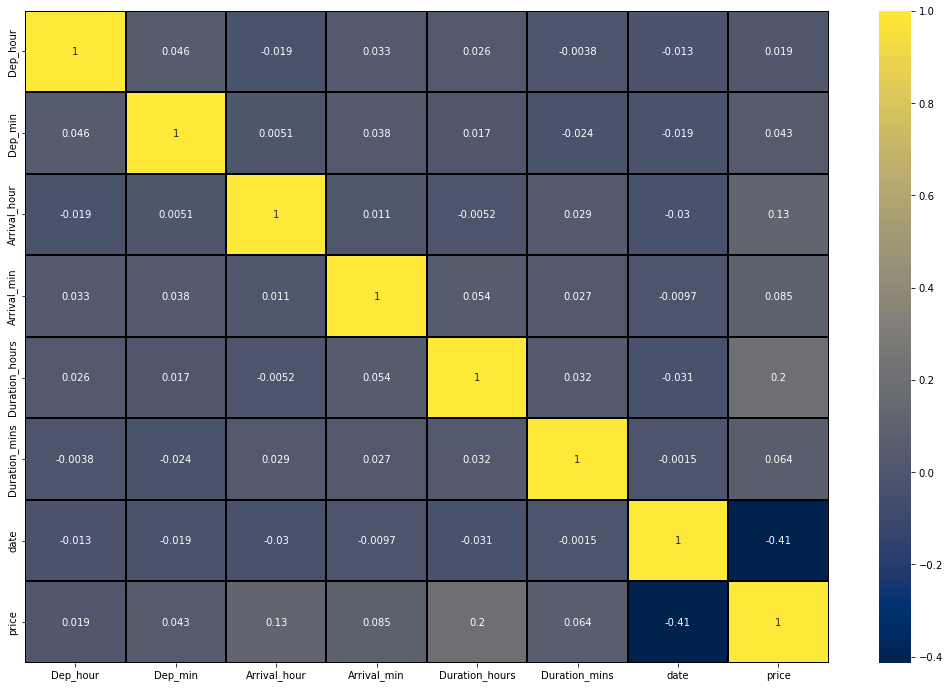

In [142]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),cmap='cividis',annot=True,linecolor='Black',linewidths=.2)

Correlation map gives the information about correlated features in dataset

the bright yellow colour represents high positive correlation 

dark blue represents negative correlation

All the features have not much correlation as their colour and value lies in middle of tha parameter

## Outliers Check

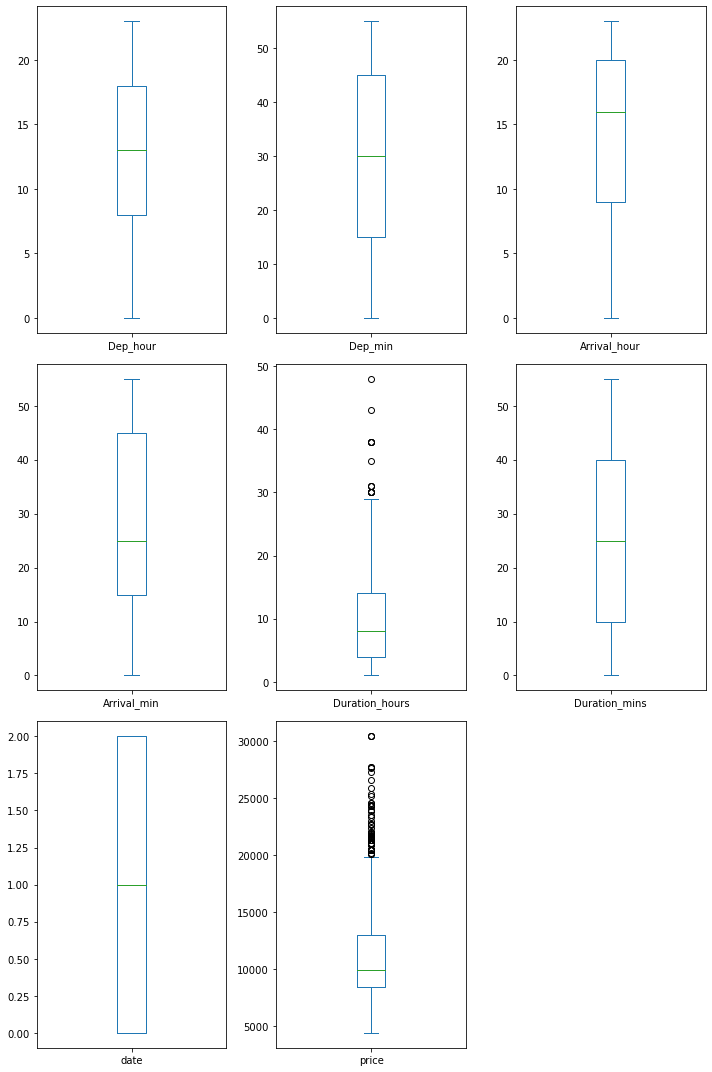

In [143]:
#plotting for outliers check
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))
plt.tight_layout()

Only Duration hours is having outliers and target column price so only removing outliers from duration hours

### Removing outliers 

#### Percentile Method

In [144]:
#Removing outliers using percentile method in dataset

percentile = df1["Duration_hours"].quantile([0.15,0.85]).values
df1["Duration_hours"][df1["Duration_hours"]<=percentile[0]]=percentile[0]
df1["Duration_hours"][df1["Duration_hours"]>=percentile[1]]=percentile[1]

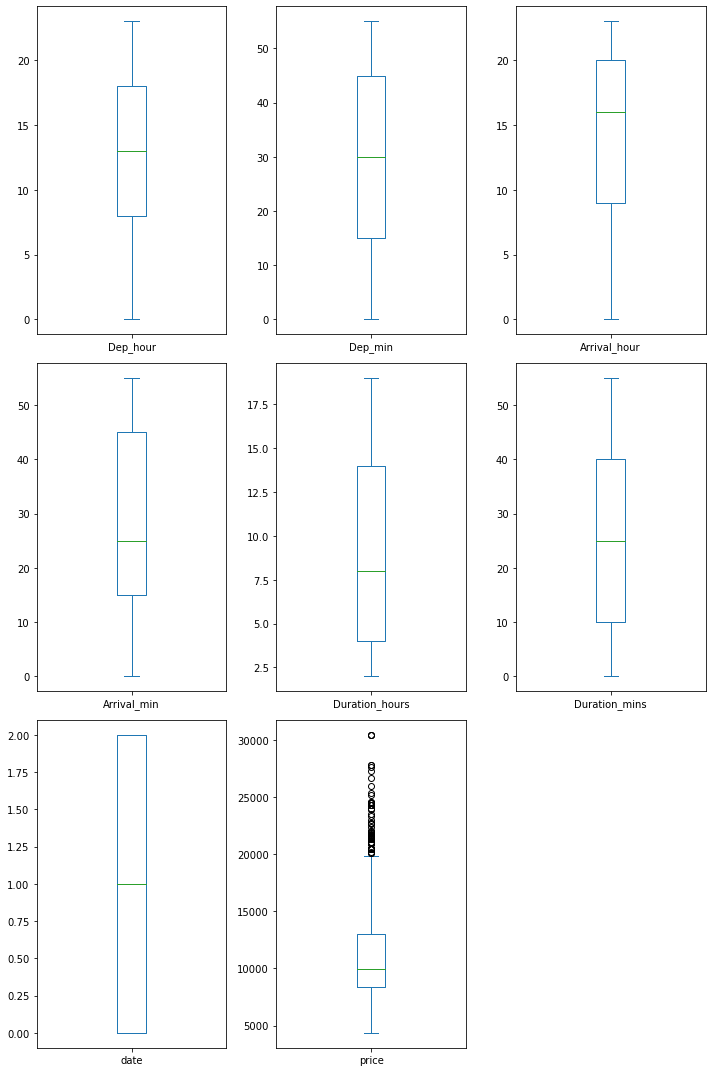

In [145]:
# plotting for outliers check after applying percentile method
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))
plt.tight_layout()

In [146]:
df1.shape

(2529, 12)

## Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data   OneHotEncoder** is used in this case

**Ordinal data   LabelEncoder** is used in this case

In [147]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0


In [148]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Kolkata,Source_Mumbai
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [149]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Delhi,Destination_Goa,Destination_Kolkata,Destination_Mumbai,Destination_Patna,Destination_Pune
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0


In [150]:

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df1.replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)

In [151]:
df1.head()

,Airline,Source,Destination,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price
1,Vistara,Delhi,Mumbai,0,5,55,7,55,2,0,1,7110
2,Indigo,Delhi,Mumbai,0,2,10,4,10,2,0,1,7109
3,Indigo,Delhi,Mumbai,0,11,55,13,55,2,0,1,7109
4,Indigo,Delhi,Mumbai,0,6,30,8,35,2,5,1,7109
5,Indigo,Delhi,Mumbai,0,7,20,9,25,2,5,1,7109


In [152]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df1 = pd.concat([df1, Airline, Source, Destination], axis = 1)
df1.head()

,Airline,Source,Destination,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Goa,Destination_Kolkata,Destination_Mumbai,Destination_Patna,Destination_Pune
1,Vistara,Delhi,Mumbai,0,5,55,7,55,2,0,...,0,1,0,0,0,0,0,1,0,0
2,Indigo,Delhi,Mumbai,0,2,10,4,10,2,0,...,0,0,0,0,0,0,0,1,0,0
3,Indigo,Delhi,Mumbai,0,11,55,13,55,2,0,...,0,0,0,0,0,0,0,1,0,0
4,Indigo,Delhi,Mumbai,0,6,30,8,35,2,5,...,0,0,0,0,0,0,0,1,0,0
5,Indigo,Delhi,Mumbai,0,7,20,9,25,2,5,...,0,0,0,0,0,0,0,1,0,0


In [153]:

df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [154]:
df1.head()

,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price,Airline_GO FIRST,...,Airline_SpiceJet,Airline_Vistara,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Goa,Destination_Kolkata,Destination_Mumbai,Destination_Patna,Destination_Pune
1,0,5,55,7,55,2,0,1,7110,0,...,0,1,0,0,0,0,0,1,0,0
2,0,2,10,4,10,2,0,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
3,0,11,55,13,55,2,0,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
4,0,6,30,8,35,2,5,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
5,0,7,20,9,25,2,5,1,7109,0,...,0,0,0,0,0,0,0,1,0,0


In [155]:
df1.Stops.value_counts()

1    1738
0     615
2     176
Name: Stops, dtype: int64


## Separating Features and Label

In [156]:
#independent column
x=df1.drop(['price'],axis=1)
#target
y=df1['price']

In [157]:
x.shape

(2529, 20)

In [158]:
y.shape

(2529,)

## Skewness check

In [159]:
df1.skew()

Stops                 -0.140962
Dep_hour              -0.081323
Dep_min               -0.106006
Arrival_hour          -0.572481
Arrival_min            0.020474
Duration_hours         0.406452
Duration_mins          0.178375
date                  -0.160337
price                  1.023935
Airline_GO FIRST       1.776606
Airline_Indigo         0.976436
Airline_SpiceJet       1.937228
Airline_Vistara        0.786441
Source_Kolkata         2.596156
Source_Mumbai          0.842205
Destination_Delhi      1.158435
Destination_Goa        1.830659
Destination_Kolkata    2.652948
Destination_Mumbai     1.899369
Destination_Patna      5.717287
Destination_Pune       3.660234
dtype: float64

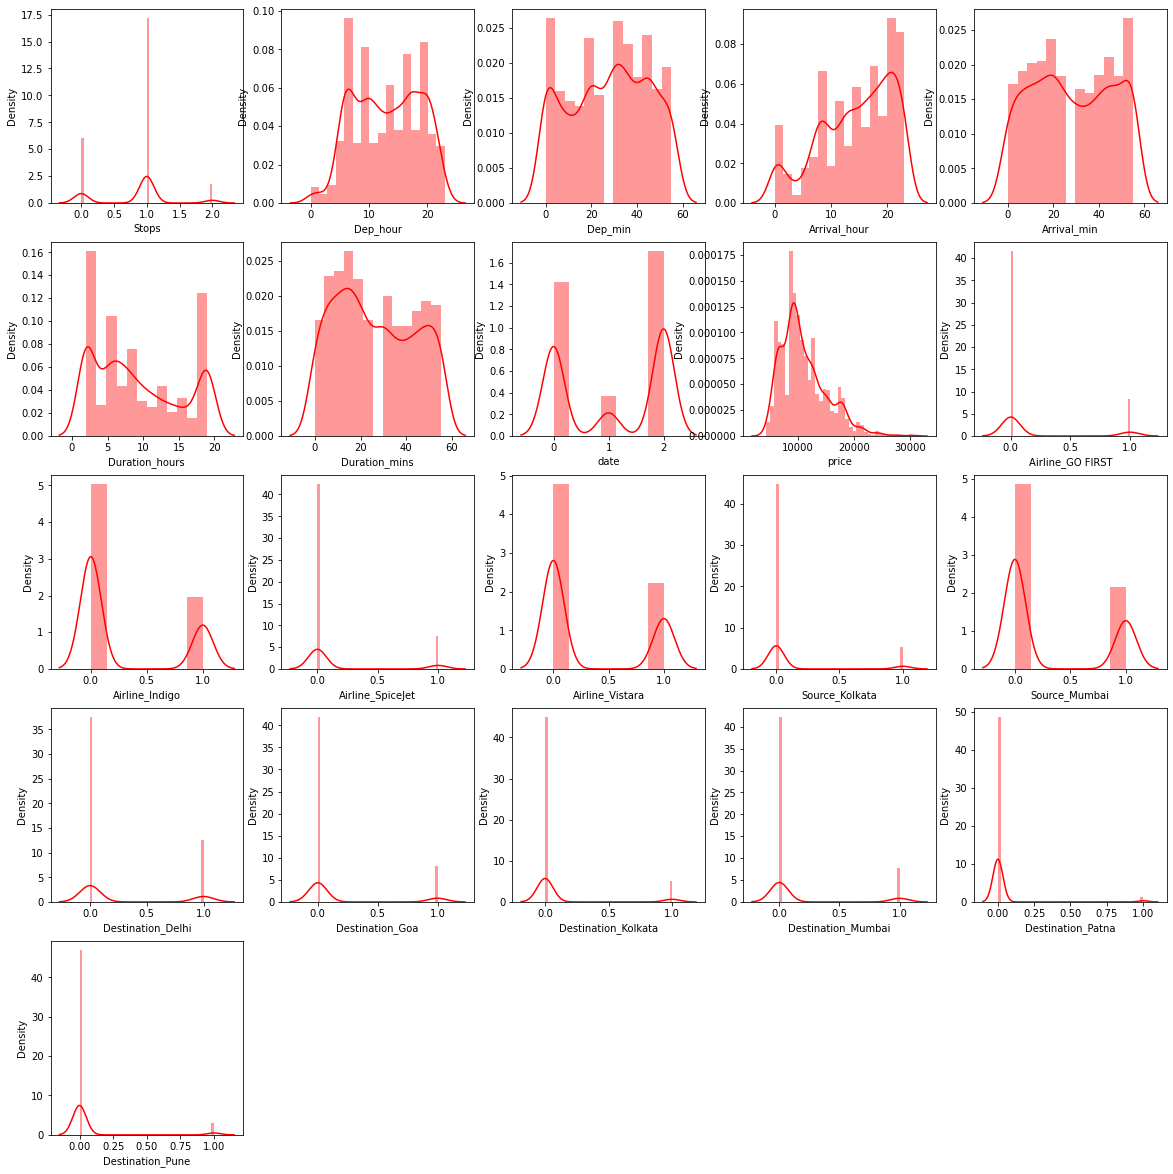

In [160]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=28:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(df1[column],color='red')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

DATA SHOWING THE SKEWNESS WHICH ARE NOT ENCODED ARE TO BE TRANSFORM USING POWER TRANSFORM YEO JOHNSON METHOD 

### SO REMOVING SKEWNESS

In [161]:
features = ["Arrival_hour","Duration_hours"]

In [162]:
df.Airline.value_counts()

Vistara        1238
Indigo          998
Air India       944
GO FIRST        506
SpiceJet        462
AirAsia         329
AllianceAir       3
Name: Airline, dtype: int64

In [163]:
from sklearn.preprocessing import power_transform
for i in features:
    df1[i]=power_transform(df1,method='yeo-johnson')
df1.head()

,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,price,Airline_GO FIRST,...,Airline_SpiceJet,Airline_Vistara,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Goa,Destination_Kolkata,Destination_Mumbai,Destination_Patna,Destination_Pune
1,0,5,55,-1.534087,55,-1.534087,0,1,7110,0,...,0,1,0,0,0,0,0,1,0,0
2,0,2,10,-1.534087,10,-1.534087,0,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
3,0,11,55,-1.534087,55,-1.534087,0,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
4,0,6,30,-1.534087,35,-1.534087,5,1,7109,0,...,0,0,0,0,0,0,0,1,0,0
5,0,7,20,-1.534087,25,-1.534087,5,1,7109,0,...,0,0,0,0,0,0,0,1,0,0


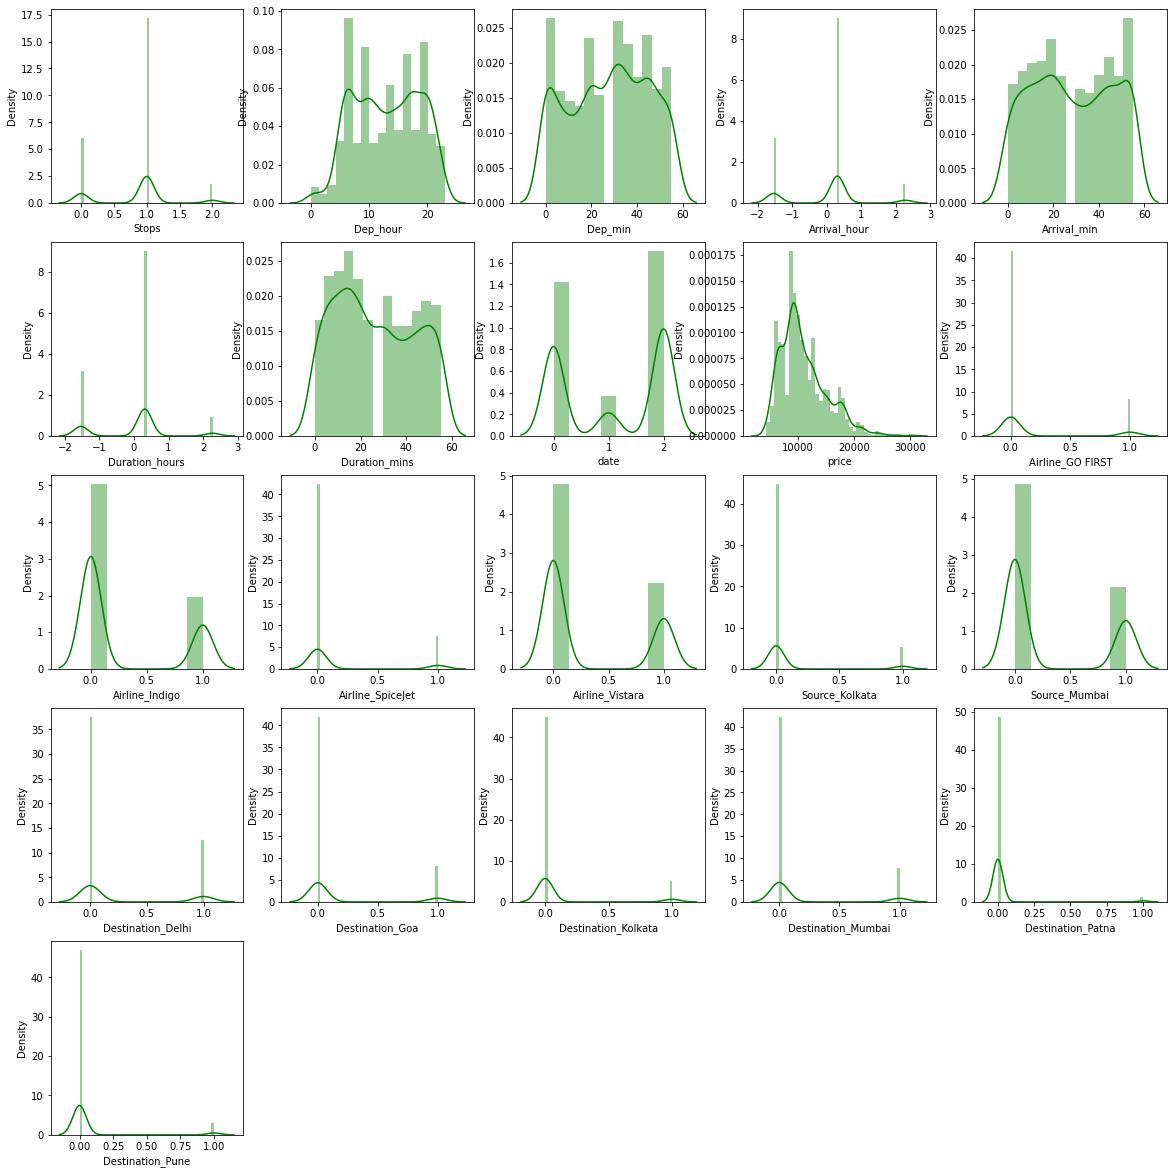

In [164]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=28:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(df1[column],color='green')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

## Scaling

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,date,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Goa,Destination_Kolkata,Destination_Mumbai,Destination_Patna,Destination_Pune
0,-1.554465,-1.445379,1.577837,-1.141795,1.519984,-1.192969,-1.530415,-0.085163,-0.44944,-0.624759,-0.423758,1.467435,-0.340681,-0.664098,-0.576589,-0.440512,-0.334869,2.327828,-0.169957,-0.25552
1,-1.554465,-1.984916,-1.024376,-1.604650,-1.035516,-1.192969,-1.530415,-0.085163,-0.44944,1.600616,-0.423758,-0.681461,-0.340681,-0.664098,-0.576589,-0.440512,-0.334869,2.327828,-0.169957,-0.25552
2,-1.554465,-0.366305,1.577837,-0.216084,1.519984,-1.192969,-1.530415,-0.085163,-0.44944,1.600616,-0.423758,-0.681461,-0.340681,-0.664098,-0.576589,-0.440512,-0.334869,2.327828,-0.169957,-0.25552
3,-1.554465,-1.265533,0.132163,-0.987510,0.384206,-1.192969,-1.238814,-0.085163,-0.44944,1.600616,-0.423758,-0.681461,-0.340681,-0.664098,-0.576589,-0.440512,-0.334869,2.327828,-0.169957,-0.25552
4,-1.554465,-1.085688,-0.446107,-0.833225,-0.183682,-1.192969,-1.238814,-0.085163,-0.44944,1.600616,-0.423758,-0.681461,-0.340681,-0.664098,-0.576589,-0.440512,-0.334869,2.327828,-0.169957,-0.25552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,2.207489,-0.186459,-0.735241,1.326766,-0.467627,-0.034169,0.219191,0.975803,-0.44944,-0.624759,-0.423758,1.467435,-0.340681,1.505803,-0.576589,-0.440512,-0.334869,-0.429585,-0.169957,-0.25552
2525,2.207489,-0.186459,-0.735241,-0.833225,-1.603404,-0.861884,0.219191,0.975803,-0.44944,-0.624759,-0.423758,1.467435,-0.340681,1.505803,-0.576589,-0.440512,-0.334869,-0.429585,-0.169957,-0.25552
2526,2.207489,-0.186459,-0.735241,-0.678939,1.236039,-0.530798,0.802393,0.975803,-0.44944,-0.624759,-0.423758,1.467435,-0.340681,1.505803,-0.576589,-0.440512,-0.334869,-0.429585,-0.169957,-0.25552
2527,2.207489,-0.186459,-0.735241,1.172481,0.668151,-0.034169,0.510792,0.975803,-0.44944,-0.624759,-0.423758,1.467435,-0.340681,1.505803,-0.576589,-0.440512,-0.334869,-0.429585,-0.169957,-0.25552


## Checking VIF values to solve multicollinearity

In [166]:
x.columns

Index(['Stops', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'date', 'Airline_GO FIRST',
       'Airline_Indigo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Delhi',
       'Destination_Goa', 'Destination_Kolkata', 'Destination_Mumbai',
       'Destination_Patna', 'Destination_Pune'],
      dtype='object')

In [167]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.148877,Stops
1,1.027053,Dep_hour
2,1.018497,Dep_min
3,1.037132,Arrival_hour
4,1.055682,Arrival_min
5,1.080677,Duration_hours
6,1.034438,Duration_mins
7,1.012136,date
8,2.644425,Airline_GO FIRST
9,3.378007,Airline_Indigo


NO MULTICOLINEARITY SO MOVING TOWARDS MODEL BUILDING

## Regression Model Building

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [169]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8423638392528663 on random_state: 54


##### so the best random state is 54

# Splitting the DataFrame
TRAIN_TEST_SPLIT

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=54)

# Model Building

# DecisionTreeRegressor

In [171]:

from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred=dtc.predict(x_test)


print('score : ',dtc.score(x_train,y_train))
print('r2 score : ',r2_score(y_test,dtc_pred))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,dtc_pred))
print('Mean squared error:', mean_squared_error(y_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,dtc_pred)))

score :  1.0
r2 score :  0.6915353116814669
Mean absolute error: 1247.475763016158
Mean squared error: 5211646.078994614
Root mean squared error: 2282.9029937766986


# Ridge Regression

In [186]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(x_train,y_train)
predrr=rr.predict(x_test)
print('Score: ',rr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrr))

# printing errors
print('Mean absolute error:', mean_absolute_error(y_test,predrr))
print('Mean squared error:', mean_squared_error(y_test,predrr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrr)))

Score:  0.6057788138544564
r2 score:  0.6136358758449897
Mean absolute error: 1835.8791694720746
Mean squared error: 6527791.1831429135
Root mean squared error: 2554.9542428667705


# RandomForestRegressor

In [173]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Score: ',rf.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrf))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))

Score:  0.9731384529950098
r2 score:  0.8367409083876516
Mean absolute error: 1068.5859425493713
Mean squared error: 2758333.893256194
Root mean squared error: 1660.8232576816215


# GradientBoostingRegressor

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr= gbr.predict(x_test)
print('Score: ',gbr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predgbr))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predgbr))
print('Mean squared error:', mean_squared_error(y_test,predgbr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predgbr)))

Score:  0.7755458186052308
r2 score:  0.7722400328204475
Mean absolute error: 1399.7687123728222
Mean squared error: 3848104.450378799
Root mean squared error: 1961.658596794763


# BaggingRegressor

In [175]:
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor()
br.fit(x_train,y_train)
predbr= br.predict(x_test)
print('Score: ',br.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predbr))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predbr))
print('Mean squared error:', mean_squared_error(y_test,predbr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predbr)))

Score:  0.9598595617807153
r2 score:  0.8124928170432592
Mean absolute error: 1130.3371633752245
Mean squared error: 3168016.022082586
Root mean squared error: 1779.8921377663833


## Randomforestregressor has more mean score than other.So we choose RandomForestRegressor as our best model.We have to hypertune it's parameter.
# Hyperparameter tuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param={'n_estimators':[10,50,70,100,140,200]}

In [178]:
rf=RandomForestRegressor()
gscv=GridSearchCV(rf,param)
gscv.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 70, 100, 140, 200]})

In [179]:
gscv.best_params_

{'n_estimators': 140}

In [180]:
gscv.best_estimator_

RandomForestRegressor(n_estimators=140)

In [181]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
print("Score of Model is",r2_score(y_test,y_pred))
print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",(np.sqrt(mean_squared_error(y_test,y_pred))))

Score of Model is 0.8379241456210329
Mean Absolute Error 1050.4756912028724
Mean Squared Error 2738342.581701257
Root Mean Squared Error 1654.793818486538


## RandomforestRegressor gave a good result of 84.85% after hyperparameter tuning.

## Best Fit Line

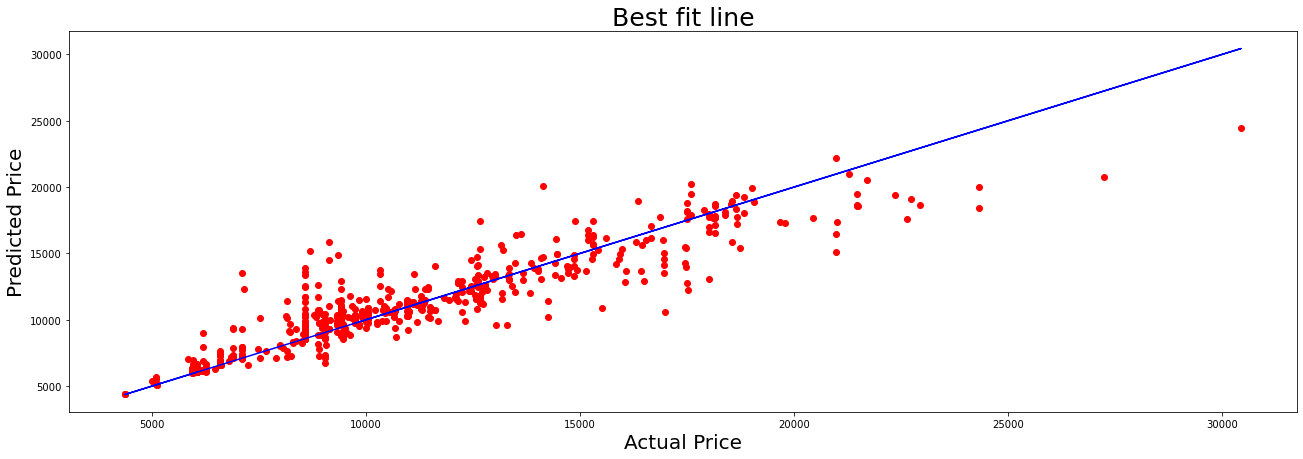

In [182]:
#Plotting y_test and y_pred
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=20)
plt.ylabel('Predicted Price',fontsize=20)
plt.title('Best fit line',fontsize=25)
plt.show()

## Saving Model

In [183]:
import pickle
pickle.dump(rf,open("Flight_price_Project.pkl",'wb'))

## Final Prediction Submission

In [184]:
import numpy as np
z = np.array(y_test)
predicted = np.array(rf.predict(x_test))
df = pd.DataFrame(zip(z,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,9734,9739.54
1,18158,18715.97
2,10522,11741.92
3,6269,6146.85
4,14868,14615.82
...,...,...
552,8892,12654.53
553,5103,5683.55
554,9132,15829.80
555,10391,10733.96
